# Majorana Stars and Structured Gaussian Beams

In this notebook, we'll be exploring yet another fascinating application of our favorite construction: the "Majorana stars." 

We know well how we can view constellations on the 2-sphere as SU(2) representations, in other words, as spin-j states (up to phase). These states represent the intrinsic angular momentum of a massive particle. On the other hand, massless particles also have a form of intrinsic angular momentum: polarization. Indeed, we've seen how we can use the sphere to represent polarization states: a trick that was known even to Poincare. 

To refresh your memory:

Given a qubit quantized along the $Z$ axis, we can obtain the corresponding polarization ellipse simply by rotating the overall phase of the state, and taking the real part of its two components. If we treat these two real numbers as $(x, y)$ coordinates in the plane, they trace out the correct ellipse. 

In this basis, $Z+$/$Z-$ correspond to horizontal/vertical polarization, $X+$/$X-$ correspond to diagonal/antidiagonal polarization, and $Y+$/$Y-$ correspond to clockwise/counterclockwise circular polarization. Any arbitrary point on the sphere, thus, corresponds to some ellipse in the plane. 

In this case, we'd take the $Y$ axis to coincide with the linear momentum axis of the massless particle, and consider its polarization state to consist of a possible superposition of clockwise/counterclockwise states, which are sufficient to describe *any ellipse*. We could imagine that this polarization state is telling us how the photon is "corkscrewing"/oscillating in the plane orthogonal to its motion. 

A photon is of course a spin-1 particle, but since it's massless, it's $m=0$ state, which would correspond to longitudinal polarization (in the direction of its motion), must be 0, and so it reduces down to a two state system. Don't ask me for the [details](https://physics.stackexchange.com/questions/46643/why-is-the-s-z-0-state-forbidden-for-photons)!

Instead, let's visualize this correspondence between the sphere and the ellipse:

In [ ]:
from spheres import *
import vpython as vp

qubit = basis(2, 0, 'z')
xyz = spinor_xyz(qubit)

scene = vp.canvas(background=vp.color.white)
vsphere = vp.sphere(pos=vp.vector(2,0,0), color=vp.color.blue, opacity=0.3)
varrow = vp.arrow(pos=vsphere.pos, axis=vp.vector(*xyz))

x, y = components(qubit).real
vpt = vp.sphere(pos=vp.vector(x,y,0), radius=0.1, color=vp.color.yellow, make_trail=True)

for t in np.linspace(0, 2*np.pi, 8000):
    x, y = components(np.exp(1j*t)*qubit).real
    vpt.pos = vp.vector(x,y,0)
    vp.rate(1000)

More geometrically:

<img width=400 src="img/polarization_ellipse.jpeg">

On the other hand, it's less well known, but one can interpret a full spin-$1$ state of two stars geometrically in terms of polarization. According to [Bliokh, Alonso, and Dennis (and Hannay)](https://arxiv.org/abs/1903.01304): the unit vector which bisects the two stars picks out a direction normal to a plane. Projecting the two points onto this plane, one obtains the two foci of the polarization ellipse. In other words, a spin-1 state specifies an ellipse *oriented in 3D*. The direction normal to the plane is taken to be the direction of propagation of the photon. In the degenerate case of the two stars in the same location, we get circular polarization; and beautifully, the $m=0$ case, when two stars are opposite, never comes up, since the polarization plane rotates along with them, and we get linearly polarized light instead.

<img width=300 src="img/spin1_polarization.png">

(As the paper points out, however, this construction gets the size of ellipse wrong, and they suggest a slight variant as a remedy.) 


<hr>

So we have this correspondence between $X, Y, Z$ directions on the sphere and diagonal/antidiagonal, clockwise/counterclockwise, horizontal/vertical polarization states in the plane.

This manifests as well in the oscillator representation. As we've seen, we can "second quantize" a qubit, introducing a quantum harmonic oscillator to each of its two basis states $\mid \uparrow \rangle$ and $\mid \downarrow \rangle$, and interpret the resulting Fock space in terms of a "tower" of spin states of all possible $j$ values. To wit, the $\mid 00 \rangle$ state of the two oscillators corresponds to a spin-$0$ state, the $\mid 10 \rangle$ and $\mid 01\rangle$ oscillator states correspond to the two states of a spin-$\frac{1}{2}$, the $\mid 20 \rangle$, $\mid 11 \rangle$, $\mid 02 \rangle$ states correspond to the three states of a spin-$1$, and so on. By a standard construction, we can second quantize qubit operators to act on the whole Fock space, obtaining second quantized versions of the Pauli matrices, which are block diagonal, and generate simultaneous rotations in each of the spin sectors. 

If, however, we consider the position wavefunctions of the two oscillators, which is the same thing as the position wavefunction of a single 2D oscillator in the plane, then we notice something interesting. $X$ eigenstates correspond to diagonally/antidiagonally symmetric position states, $Y$ eigenstates correspond to circularly symmetric position states, and $Z$ eigenstates correspond to horizontally/vertically symmetric position states. 

Below, we look at a random state of the two oscillators and make a spin measurement. Above, you see the tower of spin states from $0, \frac{1}{2}, 1, \dots$; and below, a plane where the amplitudes for the positions are depicted as black arrows. They are discretized because we've truncated the Fock space. The yellow dot represented the expected position of the 2D quantum oscillator. Try it for $X$, $Y$, and $Z$!

In [ ]:
from spheres import *

scene = vp.canvas(background=vp.color.white)
s = SchwingerSpheres(state=vacuum(cutoff_dim=5), scene=scene, show_plane=True)
s.random(); s.measure('y')

Does this have a physical interpretation? Certainly, if you want to analyze a 2D quantum oscillator, it might be useful to exploit this "stellar decomposition." But are we still talking about polarization, or what?

It turns out that the correct interpretation isn't in terms of the polarization of light--in other words, its intrinsic angular momentum--but in terms of the [*orbital* angular momentum of light](https://en.wikipedia.org/wiki/Orbital_angular_momentum_of_light), its extrinsic angular momentum--with an interesting twist, as we'll see!

We're perhaps more familiar with the case for a massive particle, which has both a spin and orbital angular momentum. The latter given by $L = Q \times P$ or:

$$ L_{x} = Q_{y}P_{z} - Q_{z}P_{y} $$

$$ L_{y} = Q_{z}P_{x} - Q_{x}P_{z} $$

$$ L_{z} = Q_{x}P_{y} - Q_{y}P_{x} $$

Here the $Q$'s and $P$'s are the position and momentum operators. The total angular momentum is the sum of the spin and orbital parts. 

Well, the same goes for light! On the one hand, if a light beam is cylindrically symmetric, and one choses the origin at the beam axis, then the orbital angular momentum will be 0. On the other hand, one can consider helical modes of light, such that the beam's wavefront is corkscrewing around an "optical vortex" at the center.

<img width=200 src="img/corkscrew.png">

One imagines polarization itself as a kind of corkscrewing, but this is actually a second level kind of corkscrewing. Consider this image:

<img width=400 src="img/polarization_and_wavefront.png">

The idea is we're considering a spatial cross section of a beam, such that the polarization state actually varies across it! In other words, the polarization is a property of "each point" as it were, each photon, but the OAM is a property of the overall beam. <a href="https://www.colgate.edu/media/5371/download">This</a> is a great reference.

<hr>

Today we'll be considering "structured Gaussian beams." They are solutions to the "paraxial wave equation," in other words, the regime of something like a laser, where pretty much everything that's going on is going on close to the axis of propagation (the small angle apparoximation). Structured Gaussian beams are "self-similar," in that their cross-sections all look the same up to scaling. The structured part is going to make things interesting!

Following [Bassa and Konrad](http://events.saip.org.za/getFile.py/access?contribId=365&sessionId=18&resId=0&materialId=paper&confId=7), we can turn Maxwell's equations into scalar wave equations for each component of the electric and magnetic fields:

$$ \nabla^{2}\Psi - \frac{1}{v^2}\frac{\partial^{2}}{\partial t^{2}}\Psi = 0 $$

$\Psi$ is going to be a complex valued function, assigning "amplitudes" to each point in space and time, whose complex phase corresponds to the phase of the EM wave, and whose amplitude squared corresponds to the intensity.

We want to consider a laser beam heading in one direction, monochromatic,  whose transverse beam profile $u(x,y,z)$ varies slowly as it zips along in the z direction (the longitudinal direction).

First, we can separate out the time part $\Psi(x,y,z,t) = u(x, y, z)e^{-i\omega t}$, where $\omega$ is the angular frequency. Thus the spatial part $u(x, y, z)$ must satisfy:

$$ \nabla^{2}u(x, y, z) + k^2 u(x, y, z) = 0$$

Since the wave number $k = \frac{\omega}{v}$.

Now we engage in some simplification. We want $u(x, y, z)$ to have the form:

$$ u(x, y, z) = u_{0}(x, y, z)e^{ikz} $$

Which will account for the wave oscillation along the propagation direction.

Plugging in (and expanding out the $\nabla^2$) we obtain:

$$ \frac{\partial^2 u_{0}}{\partial x^2} + \frac{\partial^2 u_{0}}{\partial y^2} + \frac{\partial^2 u_{0}}{\partial z^2} + 2ik\frac{\partial u_{0}}{dz} = 0$$

To obtain the paraxial approximation we consider $u_{0}$ to vary slowly with $z$ (leading to a slow decrease in amplitude as the wave propagates), and thus drop the $\frac{\partial^2 u_{0}}{\partial z^2}$ term, obtaining:

$$ (\frac{\partial^{2}}{\partial x^{2}} + \frac{\partial^2}{\partial y^2})u_{0}(x, y, z) = -2ik\frac{\partial}{\partial z}u_{0}(x, y, z) $$

Looking at this equation, it might occur to you that it looks exactly like the Schrodinger equation for a two dimensional free particle! Only the $z$ coordinate is playing the role of time! (And the wave number is acting like Planck's constant!) 

We're just talking about a classical EM wave, and yet here we find a quantum equation staring us in the face. 

Solutions to this equation can be interpreted in both a classical and a quantum sense, and one thing that means is that we can use all of our quantum mechanical machinery to deal with this classical "wavefunction."

Indeed, we could consider the two dimensional quantum harmonic oscillator, as we did originally, and consider all of its energy states: they form a complete basis for wavefunctions on the plane. And so in principle, we could decompose our *classical light beam* in terms of the basis states of the *quantum 2D oscillator*. 

And because of that, we'll be able to associate to the beam a set of Majorana constellations. 

Indeed, we can employ the whole formalism of creation and annihilation operators, and so forth. And in fact, for structured Gaussian beams specifically, the 2D quantum harmonic oscillator Hamiltonian will describe the propagation of the beam: the z-axis will play the role of time. 

Of course, to actually consider a *quantum light beam*, we'd have to second quantize: for each mode into which we've decomposed the beam, we'd have to introduce a quantum harmonic oscillator to counts the number of photons in that mode, and so on, and so forth. 

But I want to emphasize the bizarre classical/quantum incest that's going on here. We can represent the classical light beam as a "state vector", whose cross sections will be the transverse beam profile of the electric field (which is measurable)--but this is different from the wavefunction of a photon in that mode! In the first case, the amplitude squared of the wavefunction represents the intensity of the electric field, whereas in the second case the amplitude squared represents the probability for finding a photon in that state. 

<hr>

The simplest solution to the paraxial Maxwell's equations is the Gaussian beam. 

<img width=500 src="img/gaussian.png">

Here, $A$ is some normalization.
    
$w_{0}$ is the "waist radius" or "beam waist", which measures the size of the beam at the point of focus $z=0$, and $w(z)$ is the beam width. 

$R(z) = z(1 + (\frac{z_{R}}{z})^2)$ is the the radius of curvature of the beam's wavefronts.

$z_{R}$ is the "Rayleigh distance": $\frac{\pi w_{0}^2 n}{\lambda}$, where $\lambda$ is the wavelength and $n$ is the index of refraction. 

$\phi(z) = \arctan(\frac{z}{z_{R}})$ is the Gouy phase, which has a great name!

This picture from [wikipedia](https://en.wikipedia.org/wiki/Gaussian_beam) is illuminating:

<img width=400 src="img/beam_width.png">

The intensity profile, or cross section of the beam, at its point of focus, would look like:

<img width=400 src="img/gaussian_intensity.png">

In either direction along the direction of propagation, it would look the same, only slowly increasing in size. 

So that's the simplest case!

<hr>

We now turn to structured Gaussian beams.

Given what I said earlier, and knowing that the energy states of the quantum harmonic oscillator can be written in terms of the Hermite polynomials, it would make sense if we could decompose our classical light beam into the so-called [Hermite-Gaussian modes](https://en.wikipedia.org/wiki/Gaussian_beam#Hermite-Gaussian_modes), which essentially consist in two Hermite polynomials in x and y multiplied by a Gaussian. Shamelessly ripped from wikipedia:

<img width=400 src="img/hermite_gaussian.png">

Here $E_{0}$ hides the normalization and $\psi(z) = (N+1)\arctan(\frac{z}{z_{R}})$, the Gouy phase. $N = l + m$, where $l$ and $m$ denote which Hermite polynomials we're using.

Okay. But morally speaking, it's just a 2D quantum harmonic oscillator state energy state with some bells and whistles.

Compare the wavefunction for a 1D quantum harmonic oscillator energy state:

<img width=300 src="img/hermite.png">

The difference is that we've got this $\frac{w_{0}}{w(z)}$ term at the front, we're dividing things by (powers of) $w(z)$, and we have these phase terms. The effect is to make sure we're describing a beam.

<hr>

In what follows, however, we'll be following [this reference](https://arxiv.org/abs/1901.06987), and so use instead the Laguerre-Gaussian modes, which are closely related.

We'll see that the Hermite-Gaussian modes have horizontal/vertical symmetries in the plane, while the Laguerre-Gaussian modes have circular symmetries. And in fact, by using $X, Y, Z$ rotations, we'll be able to rotate Hermite-Gaussian modes into Laguerre-Gaussian modes, and vice versa, and even get modes that are in between (Hermite-Laguerre-Gaussian modes). It will be just the same correspondence that we saw before in the relationship between the sphere of a qubit and the polarization ellipse.

The Laguerre-Gauss modes are given by:

<img width=400 src="img/laguerre_gaussian.png">

Here $\textbf{r}$ is understood as $(r, \phi, w)$: we're working in cylindrical coordinates, where $w$ is $w(z)$ from above. The index $N$ takes integer values and $l$ runs from $-N$ to $N$ in steps of two. They parameterize the [generalized Laguerre polynomials](https://en.wikipedia.org/wiki/Laguerre_polynomials#Generalized_Laguerre_polynomials). We have some normalization, some phase terms, and a Gaussian falloff.

The upshot is that any structured Gaussian beam of total order $N$ can be decomposed in terms of LG modes as:

$$\mid B \rangle = \sum_{l} c_{l}\mid N, l \rangle$$

In honor of the classical/quantum crossover, we've employed the Dirac notation.

So for $N=3$, say, we'd have states for $l=-3, -1, 1, 3$. 

Finally, we  simply associate these states with the $\mid j, m \rangle$ states of a spin-$\frac{N}{2}$ particle, dividing $N$ and $l$ by $2$ to get the $j$ and $m$ values. And from the spin state, we have our stars. Easy as pie!

$$ \mid 3, -3 \rangle \rightarrow \mid \frac{3}{2}, -\frac{3}{2} \rangle$$

$$ \mid 3, -1 \rangle \rightarrow \mid \frac{3}{2}, -\frac{1}{2} \rangle$$

$$ \mid 3, 1 \rangle \rightarrow \mid \frac{3}{2}, \frac{1}{2} \rangle$$

$$ \mid 3, 3 \rangle \rightarrow \mid \frac{3}{2}, \frac{3}{2} \rangle$$

We can then describe a structured Gaussian beam of *any order* as a tower of spin states aka a spin in a superposition of $j$ values, just as we've been doing. 

<hr>

Alright, enough talk, let's see it in action!

First, let's define our LG modes. Luckily, scipy can help us with our generalized Laguerre polynomials. 

In [3]:
from math import factorial
from numpy import sqrt, pi, exp, abs, angle
from scipy.special import eval_genlaguerre

def laguerre_gauss_mode(N, l, coordinates="cartesian"):
    """
    N is an integer.
    l runs from -N to N in steps of 2.
    """
    def mode(r, phi, z): # cylindrical coordinates
        w0 = 1 # waist radius
        n = 1 # index of refraction
        lmbda = 1 # wavelength
        zR = (pi*n*(w0**2))/lmbda # rayleigh range
        w = w0*sqrt(1+(z/zR)**2) # spot size parameter
        return \
            ((1j**(abs(l)-N))/w)*\
            sqrt(((2**(abs(l)+1))*factorial((N-abs(l))/2))/\
                    (pi*factorial((N+abs(l))/2)))*\
            exp(-(r**2)/w**2)*\
            ((r/w)**abs(l))*\
            exp(1j*l*phi)*\
            eval_genlaguerre((N-abs(l))/2, abs(l), (2*r**2)/w**2)
    if coordinates == "cylindrical":
        return mode
    elif coordinates == "cartesian":
        def cartesian(x, y, z):
            c = x+1j*y
            r, phi = abs(c), angle(c)
            return mode(r, phi, z)
        return cartesian

Now we need a way to visualize them. The LG modes give us a complex value for each cylindrical coordinate. We'll be visualizing them in the standard way in the plane, where color will correspond to the phase, and brightness to the magnitude.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from colorsys import hls_to_rgb

# Adapted from:
# https://stackoverflow.com/questions/17044052/mathplotlib-imshow-complex-2d-array
def colorize(z):
    n,m = z.shape
    c = np.zeros((n,m,3))
    c[np.isinf(z)] = (1.0, 1.0, 1.0)
    c[np.isnan(z)] = (0.5, 0.5, 0.5)
    idx = ~(np.isinf(z) + np.isnan(z))
    A = (np.angle(z[idx]) + np.pi) / (2*np.pi)
    A = (A + 0.5) % 1.0
    B = 1.0 - 1.0/(1.0+abs(z[idx]))
    c[idx] = [hls_to_rgb(a, b, 1) for a,b in zip(A,B)]
    return c

def viz_beam(beam, size=3.5, n_samples=100):
    x = np.linspace(-size, size, n_samples)
    y = np.linspace(-size, size, n_samples)
    X, Y = np.meshgrid(x, y)
    plt.imshow(colorize(beam(X, Y, np.zeros(X.shape))), interpolation="none", extent=(-size,size,-size,size))
    plt.show()

First, let's check out $N=0, l=0$. That just corresponds to a Gaussian beam. No funky business.

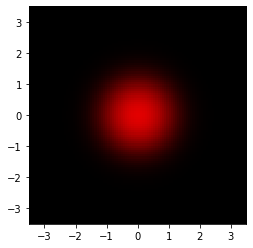

In [5]:
viz_beam(laguerre_gauss_mode(0,0))

Modes $N=1, l=-1, 1$ correspond to a corkscrewing beam with a optical vortex in the center.

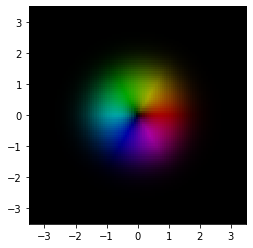

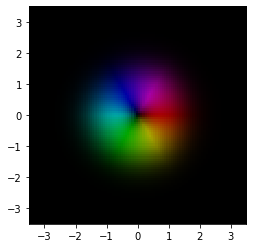

In [6]:
viz_beam(laguerre_gauss_mode(1,-1))
viz_beam(laguerre_gauss_mode(1,1))

Modes $N=2, l=-2, 0, 2$:

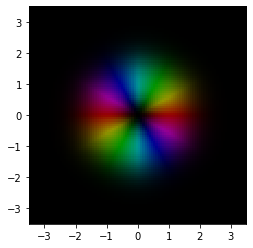

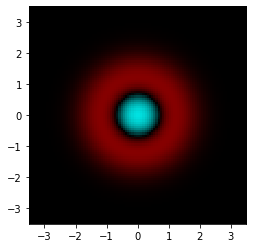

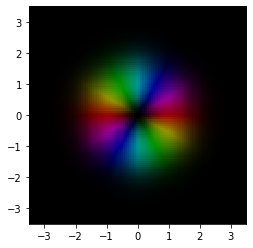

In [7]:
viz_beam(laguerre_gauss_mode(2,-2))
viz_beam(laguerre_gauss_mode(2,0))
viz_beam(laguerre_gauss_mode(2,2))

Modes $N=3, l=-3, -1, 1, 3$:

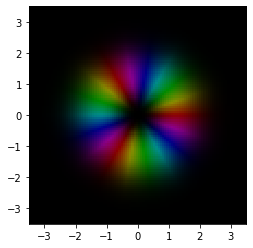

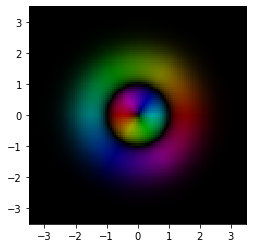

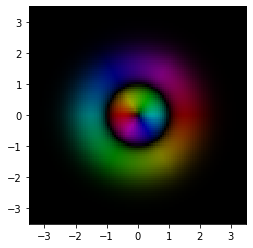

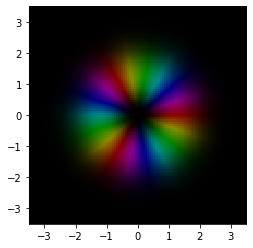

In [8]:
viz_beam(laguerre_gauss_mode(3,-3))
viz_beam(laguerre_gauss_mode(3,-1))
viz_beam(laguerre_gauss_mode(3,1))
viz_beam(laguerre_gauss_mode(3,3))

We can see that the LG modes are basically going to give us concentric rings.

Now let's incorporate the stars. Given a spin state, we'll associate its $\mid j, m \rangle$ components to LG modes, and package up the sum as a single python function. Then we'll evaluate it--and visualize the constellation as well.

In [9]:
from spheres import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spin_beam(spin, coordinates="cartesian"):
    j = (spin.shape[0]-1)/2
    v = components(spin)
    lg_basis = [laguerre_gauss_mode(int(2*j), int(2*m), coordinates=coordinates) for m in np.arange(-j, j+1)]
    if coordinates == "cartesian":
        def beam(x, y, z):
            return sum([v[int(m+j)]*lg_basis[int(m+j)](x, y, z) for m in np.arange(-j, j+1)])
        return beam
    elif coordinates == "cylindrical":
        def beam(r, phi, z):
            return sum([v[int(m+j)]*lg_basis[int(m+j)](r, phi, z) for m in np.arange(-j, j+1)])
        return beam
    
def viz_spin_beam(spin, size=3.5, n_samples=200):
    stars = spin_xyz(spin)
    beam = spin_beam(spin)
    fig = plt.figure(figsize=plt.figaspect(0.5))

    bloch_ax = fig.add_subplot(1, 2, 1, projection='3d')
    sphere = qt.Bloch(fig=fig, axes=bloch_ax)
    if spin.shape[0] != 1:
        sphere.point_size=[300]*(spin.shape[0]-1)
        sphere.add_points(stars.T)
        sphere.add_vectors(stars)
    sphere.make_sphere()

    beam_ax = fig.add_subplot(1, 2, 2)
    x = np.linspace(-size, size, n_samples)
    y = np.linspace(-size, size, n_samples)
    X, Y = np.meshgrid(x, y)
    beam_ax.imshow(colorize(beam(X, Y, np.zeros(X.shape))), interpolation="none", extent=(-size,size,-size,size))

    plt.show()

As a test, let's make sure we can reproduce this image from the paper:

<img src="img/sg_reference.png">

They start with a spin coherent state at $\phi = \frac{\pi}{2}, \theta = \frac{\pi}{2}$ in spherical coordiantes, for $j=3$. This means $6$ stars at that point on the sphere.

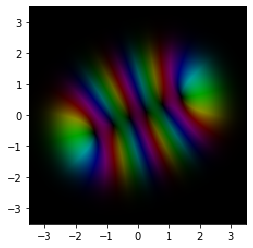

In [10]:
star = sph_xyz([np.pi/4, np.pi/4])
spin = xyz_spin([star, star, star, star, star, star])
beam = spin_beam(spin)

viz_beam(beam, size=3.5, n_samples=200)

Looks good, up to our choice of coloring scheme! So then they consider the spin state with $5$ stars at that point, and $1$ star in the opposite direction--and then $2$ stars in the opposite direction, and so on. (All of which together form a $\mid j, m \rangle$ basis set, quantized along this particular axis).

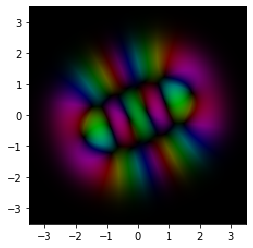

In [11]:
star = sph_xyz([np.pi/4, np.pi/4])
spin = xyz_spin([-star, star, star, star, star, star])
beam = spin_beam(spin)

viz_beam(beam, size=3.5, n_samples=200)

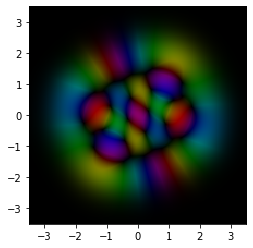

In [12]:
star = sph_xyz([np.pi/4, np.pi/4])
spin = xyz_spin([-star, -star, star, star, star, star])
beam = spin_beam(spin)

viz_beam(beam, size=3.5, n_samples=200)

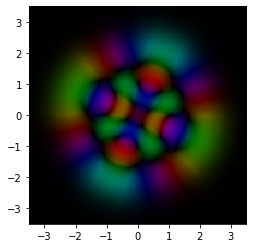

In [13]:
star = sph_xyz([np.pi/4, np.pi/4])
spin = xyz_spin([-star, -star, -star, star, star, star])
beam = spin_beam(spin)

viz_beam(beam, size=3.5, n_samples=200)

Looks good to me!

Now let's check out $X, Y, Z$ eigenstates for different $j$ values. 

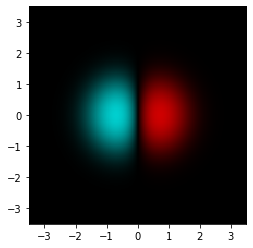

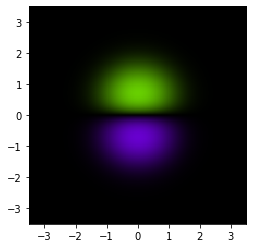

In [14]:
# j = 1/2
viz_beam(spin_beam(basis(2,0,'x')))
viz_beam(spin_beam(basis(2,1,'x')))

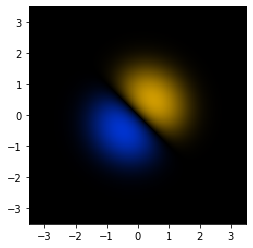

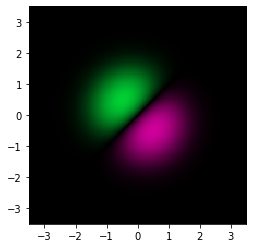

In [15]:
# j = 1/2
viz_beam(spin_beam(basis(2,0,'y')))
viz_beam(spin_beam(basis(2,1,'y')))

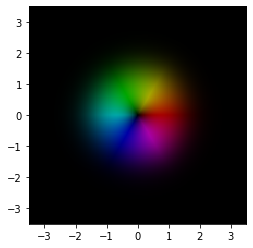

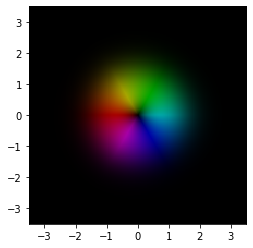

In [16]:
# j = 1/2
viz_beam(spin_beam(basis(2,0,'z')))
viz_beam(spin_beam(basis(2,1,'z')))

So: we're getting horizontally/vertically symmetric states, diagonal/antidiagonal symmetric states, and circularly symmetric states! 

Of course, the convention is a little different from the one we started out with, when we were considering the relationship between a qubit and polarization. Back then, $X$ corresponded to $D/A$, $Y$ to $R/L$, and $Z$ to $H/V$. Here we have $X$ corresponding to $H/V$, $Y$ to $D/A$ and $Z$ to $R/L$. But again, it's just a convention. 

The point is that in this construction, $Z$ eigenstates correspond to Laguerre-Gauss modes: the circularly symmetric ones. $X$ eigenstates correspond to Hermite-Gauss modes: horizontal/vertically symmetric ones. And so, as promised the Laguerre/Hermite distinction is just a rotation away!

Let's check out $j=1$:

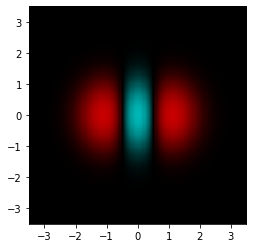

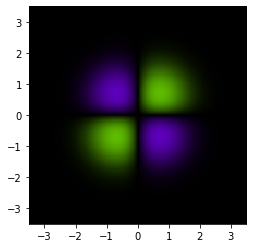

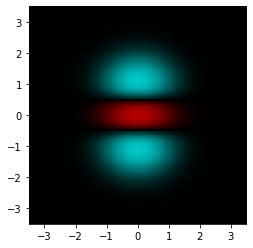

In [17]:
# j = 1
viz_beam(spin_beam(basis(3,0,'x')))
viz_beam(spin_beam(basis(3,1,'x')))
viz_beam(spin_beam(basis(3,2,'x')))

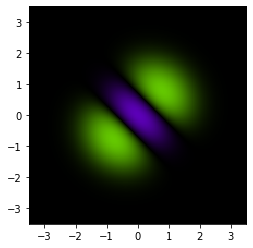

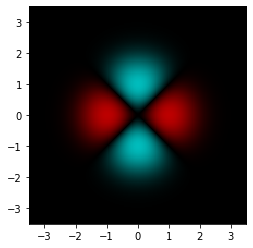

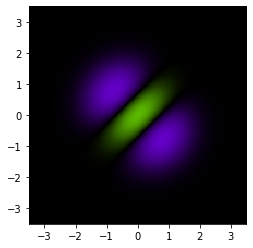

In [18]:
# j = 1
viz_beam(spin_beam(basis(3,0,'y')))
viz_beam(spin_beam(basis(3,1,'y')))
viz_beam(spin_beam(basis(3,2,'y')))

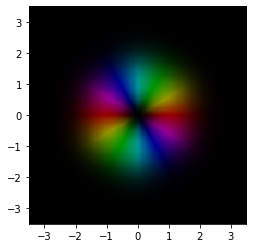

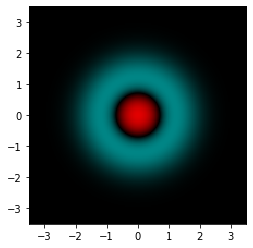

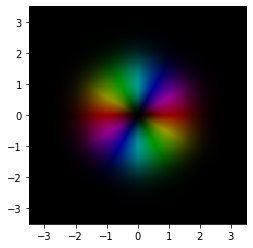

In [19]:
# j = 1
viz_beam(spin_beam(basis(3,0,'z')))
viz_beam(spin_beam(basis(3,1,'z')))
viz_beam(spin_beam(basis(3,2,'z')))

And for $j=\frac{3}{2}$. Also, for comparison, an actual *picture*, grainy due to the quantum nature of the photons:

<img width=600 src="img/actual_hg_img.png">

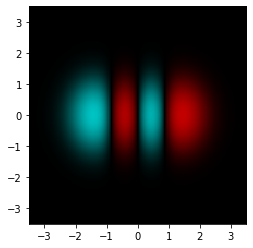

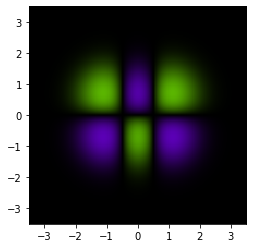

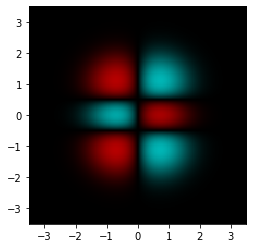

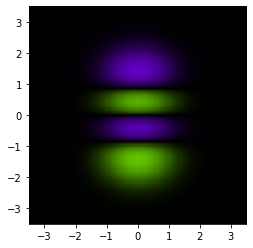

In [20]:
# j = 3/2
viz_beam(spin_beam(basis(4,0,'x')))
viz_beam(spin_beam(basis(4,1,'x')))
viz_beam(spin_beam(basis(4,2,'x')))
viz_beam(spin_beam(basis(4,3,'x')))

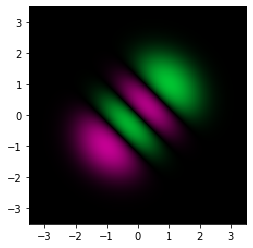

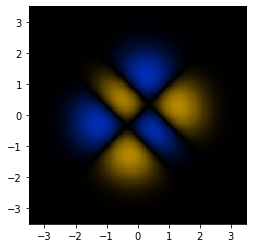

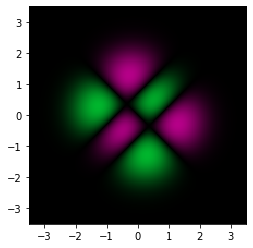

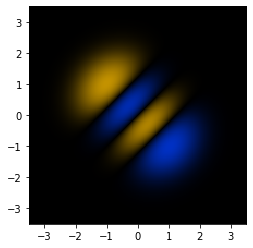

In [21]:
# j = 3/2
viz_beam(spin_beam(basis(4,0,'y')))
viz_beam(spin_beam(basis(4,1,'y')))
viz_beam(spin_beam(basis(4,2,'y')))
viz_beam(spin_beam(basis(4,3,'y')))

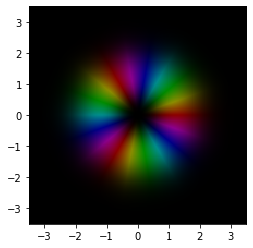

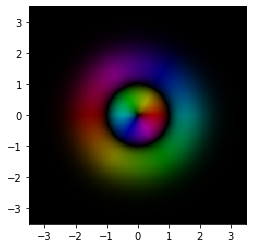

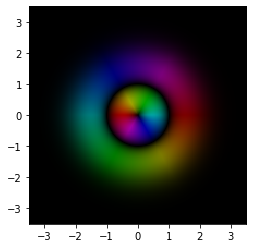

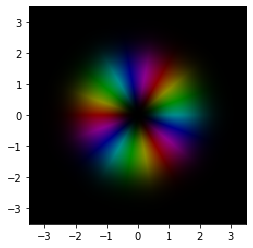

In [22]:
# j = 3/2
viz_beam(spin_beam(basis(4,0,'z')))
viz_beam(spin_beam(basis(4,1,'z')))
viz_beam(spin_beam(basis(4,2,'z')))
viz_beam(spin_beam(basis(4,3,'z')))

And then, of course, we can consider arbitrary constellations:

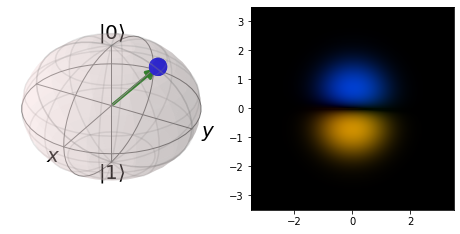

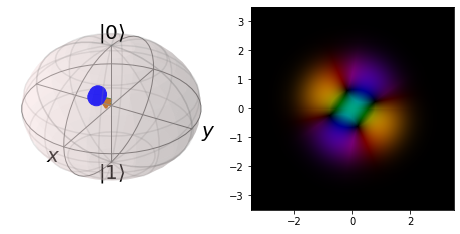

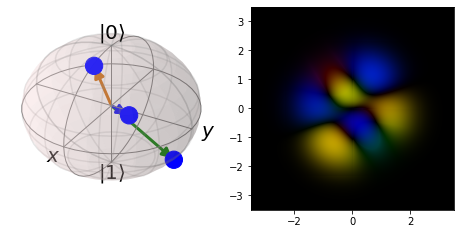

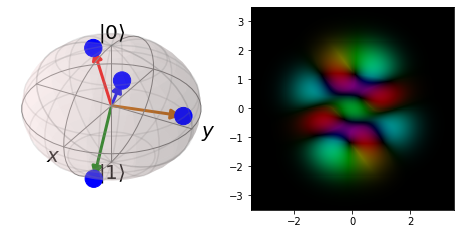

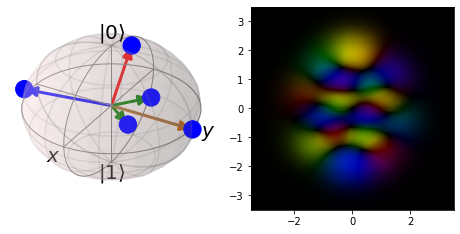

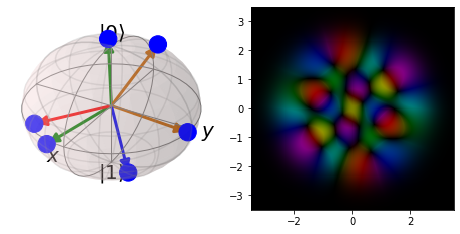

In [23]:
viz_spin_beam(qt.rand_ket(2))
viz_spin_beam(qt.rand_ket(3))
viz_spin_beam(qt.rand_ket(4))
viz_spin_beam(qt.rand_ket(5))
viz_spin_beam(qt.rand_ket(6))
viz_spin_beam(qt.rand_ket(7))

Finally, let's see them in motion! Given a spin and a Hamiltonian, the code below will evolve the spin bit by bit, calculating the associated SG beam each step of the way, and visualize everything as an animation.

In [24]:
import matplotlib.animation as animation

def animate_spin_beam(spin, H, dt=0.1, T=2*np.pi, size=3.5, n_samples=200, filename=None, fps=20):
    fig = plt.figure(figsize=plt.figaspect(0.5))

    bloch_ax = fig.add_subplot(1, 2, 1, projection='3d')
    sphere = qt.Bloch(fig=fig, axes=bloch_ax)
    sphere.point_size=[300]*(spin.shape[0]-1)
    sphere.make_sphere()

    beam_ax = fig.add_subplot(1, 2, 2)
    x = np.linspace(-size, size, n_samples)
    y = np.linspace(-size, size, n_samples)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)

    U = (-1j*H*dt).expm()
    sphere_history = []
    beam_history = []
    steps = int(T/dt)
    for t in range(steps):
        if spin.shape[0] != 1:
            sphere_history.append(spin_xyz(spin))
        beam = spin_beam(spin)
        beam_history.append(beam(X, Y, Z))
        spin = U*spin

    sphere.make_sphere()
    im = beam_ax.imshow(colorize(beam_history[0]), interpolation="none", extent=(-size,size,-size,size))
    
    def animate(t):
        if spin.shape[0] != 1:
            sphere.clear()
            sphere.add_points(sphere_history[t].T)
            sphere.add_vectors(sphere_history[t])
            sphere.make_sphere()

        im.set_array(colorize(beam_history[t])) 
        return [bloch_ax, im]

    ani = animation.FuncAnimation(fig, animate, range(steps), repeat=False)
    if filename:
        ani.save(filename, fps=fps)
    return ani

Check out the [beam vids](https://heyredhat.github.io/vids/beams): I've pre-generated animations systematically for spins of different $j$ value, visualizing both the stars and the beam profile for:

- All X/Y/Z eigenstates, and how they transform under X/Y/Z rotations, as well as phase evolution (2D oscillator hamiltonian).
- How a random constellation transforms under X/Y/Z rotations.
- How a constellation whose stars should approximate a regular polyhedron transforms under X/Y/Z rotations (we allow randomly chosen stars to repel each other for a while until they settle into a nicely regular configuration).
- How a random constellation transforms under a random Hamiltonian.

Plus, some extra vids for fun. 

<hr>

To conclude. You might be wondering about the applications of structured Gaussian beams. 

Well, from what I've heard: structured Gaussian beams can be used as "optical tweezers" to manipulate macroscopic particles, tweezing them into some desired location; they can be used to "write optical waveguides into atomic vapors"; to produce atomic traps, where atoms get attracted to regions of maximum or minimum light intensity; to make better telescopes; to increase the bandwidth of communication channels, e.g., using "twisted radio beams," c.f. "orbital angular momentum multiplexing"; as qudits in photonic quantum computation; and much more.

How to make them? Often one starts with a Gaussian beam, and there are various techniques to give the beam a "twist"-- see the links for more information! 

Finally, a little philosophy. It's clear that structured Gaussian beams have some practical value, and naturally they're of natural interest to us insofar as they represent yet another use of the Majorana stars. But I think most importantly, they show how tricky it is to cleanly separate the "classical" from the "quantum"-- the two are always locked in an endless embrace.

Already, the Majorana stars formalism itself rides the border between classical and quantum in an interesting way. Essentially, one represents quantum spin-$j$ states in terms of $2j$ copies of the *classical* phase space of a spinning object. Moreover, thinking in terms of the "coherent state wavefunction," we're representing a spin state in terms of a set of the "most classical states" it *isn't*. Moreover, the dynamics of a spin system can be reinterpreted as a classical evolution between particles (the stars) confined to the surface of the sphere, experiencing n-body forces whose weights depend on the particular Hamiltonian. 

But now we're taking this to the next level! Spin states can be embedded in the larger context of the 2D quantum harmonic oscillator, whose energy states miraculously correspond to the *classical* states of a light beam, so that now the Majorana constellations are picking out classical light beam states, which after second quantization, correspond to modes in which one can find fully quantum photons with some probability. 

Indeed, one might even say that a quantum structured Gaussian light beam could be regarded as the "third quantization" of a qubit:

We start with a classical spinning object and first quantize it into a qubit. Then we second quantize the qubit to get all the higher representations of SU(2), which correspond to nothing more than *copies* of the original classical phase space, in terms of the 2D quantum harmonic oscillator. But these quantum states also correspond to classical solutions of the paraxial Maxwell's equations for a light beam. And so we quantize a third time, introducing a harmonic oscillator to each of those modes, which count the number of photons in those states, and end up with a fully quantum beam... 

It really makes you wonder: Could the states of the quantum beam correspond to the states of *yet another* classical system, allowing us to fourth quantize, and so on... One can dream. Ironically: in the progression, we start with a sphere (spin), then we end up on the plane (2D quantum harmonic oscillator), and finally, we end up with an (approximately) 1 dimensional beam. Maybe we should look for something 0 dimensional next! Food for thought!

## References:

[Modal Majorana sphere and hidden symmetries of structured-Gaussian beams](https://arxiv.org/abs/1901.06987) 

[Gaussian Beams](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjQ_ZigzqPtAhWnQTABHZwdCA0QFjAFegQIBRAC&url=https%3A%2F%2Fwww.colgate.edu%2Fmedia%2F5371%2Fdownload&usg=AOvVaw3dMVH7k1JjDdFf9VVppDoI) 

[Representation of the quantum and classical states of light carrying orbital angular momentum](http://events.saip.org.za/getFile.py/access?contribId=365&sessionId=18&resId=0&materialId=paper&confId=7) 

[Quantum metrology at the limit with extremal Majorana constellations](https://arxiv.org/abs/1612.06804) 

[Swings and roundabouts: Optical Poincare spheres for polarization and Gaussian beams](https://arxiv.org/abs/1611.10245) 

[Geometric phases in 2D and 3D polarized fields: geometrical, dynamical, and topological aspects](https://arxiv.org/abs/1903.01304) 

[Generalized Gaussian beams in terms of Jones vectors](https://arxiv.org/abs/1908.01363)

https://en.wikipedia.org/wiki/Gaussian_beam

https://en.wikipedia.org/wiki/Orbital_angular_momentum_of_light

https://en.wikipedia.org/wiki/Optical_vortex

http://www.nhn.ou.edu/~abe/research/lgbeams/